# Simple Nueral Network

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler
import itertools
from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [42]:
df = pd.read_csv('finalDF.csv',index_col=0)
df = df.drop(columns=['glucose'])
display(df.head(5))


,hadm_id,subject_id,expire_flag,admission_type,elix_score,age,admission_type_encoded,glucose_readings,0,1,...,21,22,23,24,25,26,27,28,29,range
0,137275,9319,0,ELECTIVE,12,82,0,45,118.0,97.0,...,133.0,142.0,142.0,99.0,99.0,98.0,126.0,109.0,109.0,82.0
1,125380,31585,0,EMERGENCY,7,300,1,10,118.0,127.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
2,132722,1426,0,EMERGENCY,5,80,1,9,104.0,104.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0
3,101422,71582,0,EMERGENCY,0,76,1,21,106.0,134.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0
4,139687,68501,0,ELECTIVE,10,86,0,5,162.0,180.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.0


### Balanceding of Data: Upsample and Downsample Combined

In [43]:
from sklearn.utils import resample
df_majority = df[df.expire_flag==0]
df_minority = df[df.expire_flag==1]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,   
                                 n_samples=4000,     
                                 random_state=123) 

df_majority_downsampled = resample(df_majority, 
                                 replace=False, 
                                 n_samples=5000,     
                                 random_state=123) 

df_resampled = pd.concat([df_minority_upsampled, df_majority_downsampled])

#### Seperating Features

In [44]:
pydf = df_resampled.values
print(pydf.shape)
#split features
X = pydf[:,4:39]
y = df_resampled['expire_flag']
#normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
#X = X.reshape((X.shape[0], X.shape[1], 1)) # undo for CNN needs to be reshaped

(9000, 39)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [46]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(9000, 35)
(6300, 35)
(2700, 35)


### Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=6)
dt_model.fit(X_train,y_train)

y_pred_dt = dt_model.predict(X_test).ravel()
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt)
auc_dt = auc(fpr_dt, tpr_dt)

acc_dt = accuracy_score(y_test, y_pred_dt)


In [ ]:
#PRINT EXAMPLE DECISION TREE
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

### Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(n_estimators=100,max_depth=8)
rf_model.fit(X_train,y_train)

y_pred_rf = rf_model.predict(X_test).ravel()
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

acc_rf = accuracy_score(y_test, y_pred_rf)

### Feed Forward NN

In [100]:
from keras.models import Sequential
from keras.layers import Dense

nn_model = Sequential()
nn_model.add(Dense(20, input_dim=35, activation='relu'))
nn_model.add(Dense(10, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

nn_model.fit(X_train, y_train, epochs=75, batch_size=10)

nn_score = nn_model.evaluate(X_test, y_test)

Epoch 1/75
6300/6300 [==============================] - 1s 170us/step - loss: 0.6698 - acc: 0.5968
Epoch 2/75
6300/6300 [==============================] - 0s 72us/step - loss: 0.6289 - acc: 0.6571
Epoch 3/75
6300/6300 [==============================] - 0s 72us/step - loss: 0.6052 - acc: 0.6706
Epoch 4/75
6300/6300 [==============================] - 0s 71us/step - loss: 0.5937 - acc: 0.6811
Epoch 5/75
6300/6300 [==============================] - 0s 71us/step - loss: 0.5866 - acc: 0.6851
Epoch 6/75
6300/6300 [==============================] - 0s 72us/step - loss: 0.5832 - acc: 0.6870
Epoch 7/75
6300/6300 [==============================] - 0s 79us/step - loss: 0.5762 - acc: 0.6973
Epoch 8/75
6300/6300 [==============================] - 0s 73us/step - loss: 0.5710 - acc: 0.6940
Epoch 9/75
6300/6300 [==============================] - 0s 73us/step - loss: 0.5668 - acc: 0.7005
Epoch 10/75
6300/6300 [==============================] - 0s 76us/step - loss: 0.5645 - acc: 0.7051
Epoch 11/75
6300/6

In [66]:
y_pred_nn = nn_model.predict(X_test).ravel()
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_nn)
auc_nn = auc(fpr_nn, tpr_nn)

### Modeling with a Convelutional Neural Network

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

model = Sequential()
model.add(Conv1D(filters=100, kernel_size=8, activation='relu', input_shape=(35, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

model.fit(X_train, y_train, epochs=75, batch_size=10)

Epoch 1/75
6300/6300 [==============================] - 1s 217us/step - loss: 0.2261 - acc: 0.6294
Epoch 2/75
6300/6300 [==============================] - 1s 154us/step - loss: 0.2086 - acc: 0.6716
Epoch 3/75
6300/6300 [==============================] - 1s 157us/step - loss: 0.2005 - acc: 0.6910
Epoch 4/75
6300/6300 [==============================] - 1s 153us/step - loss: 0.1966 - acc: 0.6948
Epoch 5/75
6300/6300 [==============================] - 1s 157us/step - loss: 0.1907 - acc: 0.7090
Epoch 6/75
6300/6300 [==============================] - 1s 158us/step - loss: 0.1884 - acc: 0.7132
Epoch 7/75
6300/6300 [==============================] - 1s 157us/step - loss: 0.1860 - acc: 0.7179
Epoch 8/75
6300/6300 [==============================] - 1s 158us/step - loss: 0.1809 - acc: 0.7273
Epoch 9/75
6300/6300 [==============================] - 1s 161us/step - loss: 0.1786 - acc: 0.7287
Epoch 10/75
6300/6300 [==============================] - 1s 158us/step - loss: 0.1774 - acc: 0.7302
Epoch 11/

In [39]:
print(model.summary())
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

### Combined ROC Curve Results

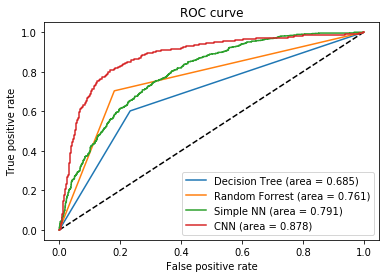

In [67]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (area = {:.3f})'.format(auc_dt))
plt.plot(fpr_rf, tpr_rf, label='Random Forrest (area = {:.3f})'.format(auc_rf))
plt.plot(fpr_nn, tpr_nn, label='Simple NN (area = {:.3f})'.format(auc_nn))
plt.plot(fpr_keras, tpr_keras, label='CNN (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

### Combined Accuracy Results

In [103]:
print("Accuracy Decision Tree: ",acc_dt)
print("Accuracy Random Forrest: ",acc_rf)
print("Accuracy Simple NN: 0.7708")
print("Accuracy CNN: 0.9429" )


Accuracy Decision Tree:  0.6933333333333334
Accuracy Random Forrest:  0.772962962962963
Accuracy Simple NN: 0.7708
Accuracy CNN: 0.9429


### Confusion Matrix

Confusion matrix, without normalization
[[1175  324]
 [ 188 1013]]


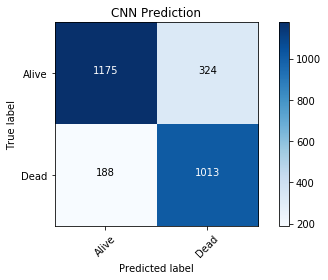

In [41]:
from sklearn.metrics import confusion_matrix 
labels = ['Alive','Dead']
y_pred = model.predict(X_test)
y_pred[y_pred <= 0.5] = 0.
y_pred[y_pred > 0.5] = 1.
y_pred = y_pred.reshape(-1)
y_pred = y_pred.astype(np.int64)
y_test = y_test.astype(np.int64)
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
plot_confusion_matrix(cm,labels,title='CNN Prediction')

In [2]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig('ConMat.png')